In [6]:
#making sure that dataset is present
import pandas as pd
df = pd. read_csv ('Heart Fail Prediction.csv')
print (df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

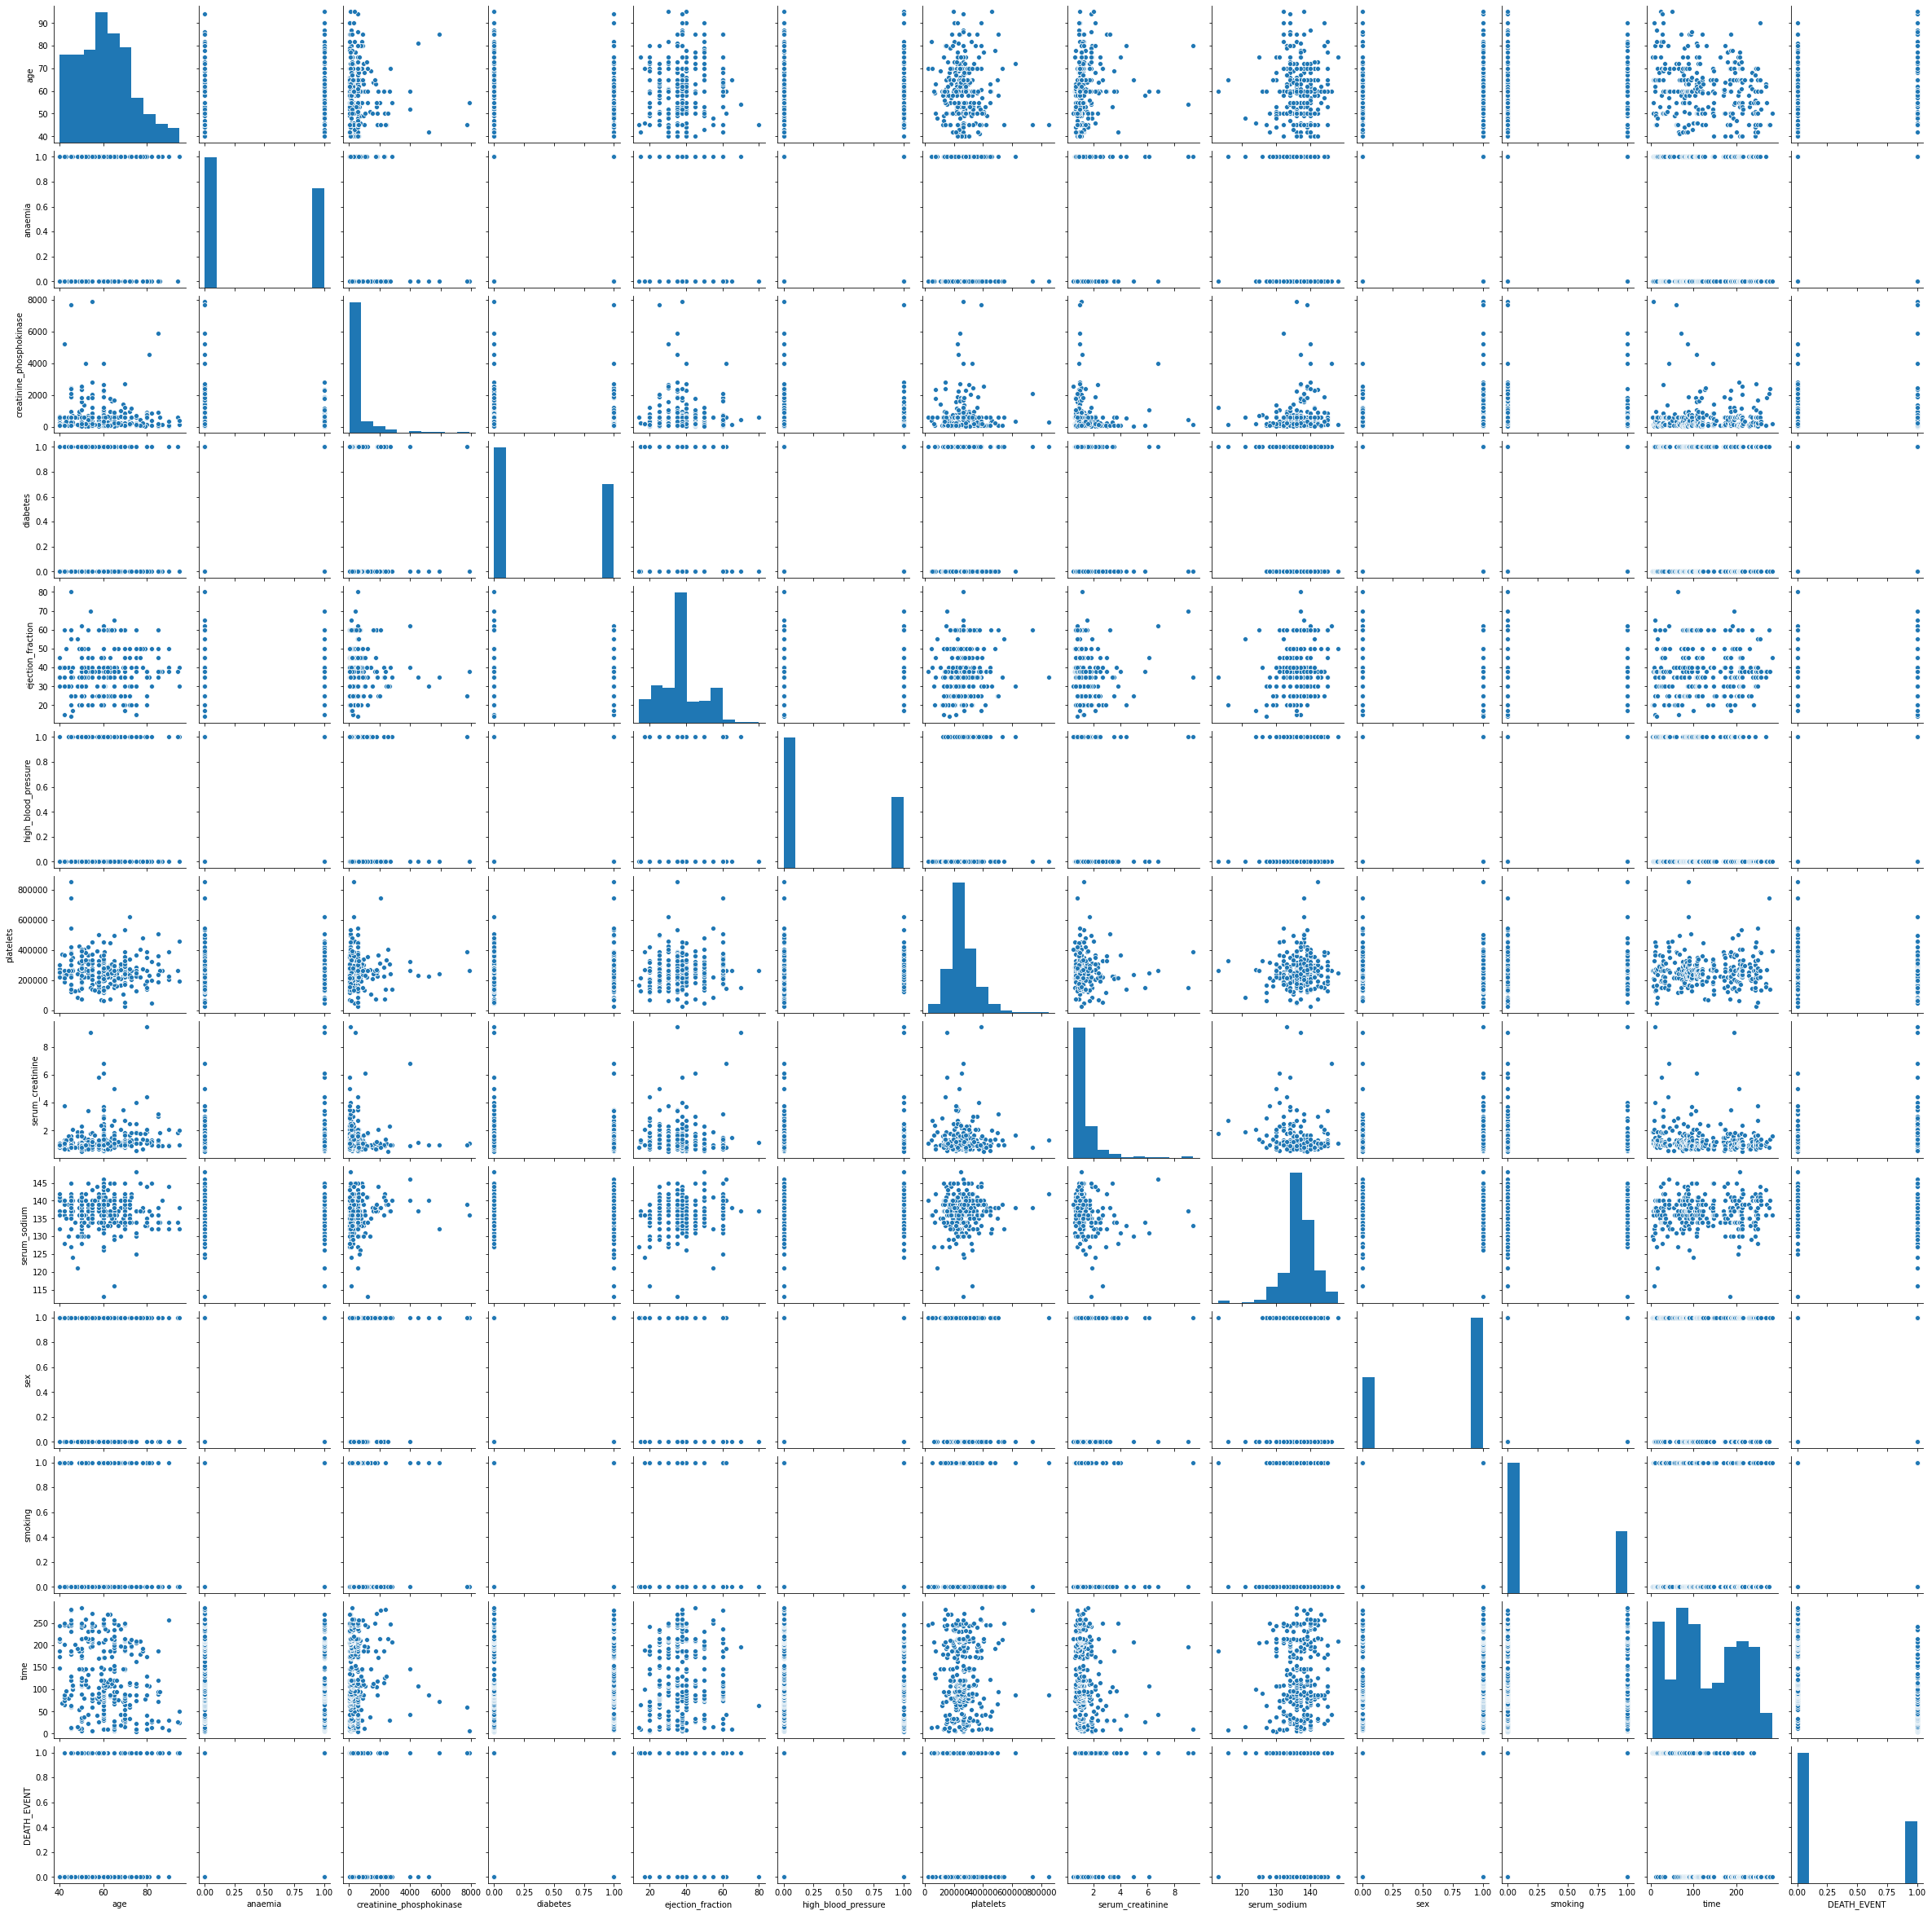

In [3]:
#visualizing data more meaningfully

#from seaborn
import seaborn as sns
fig = sns.pairplot(df)

In [5]:
# getting statistical meaining of dataset

print (df.describe())
print(df.shape)

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [5]:
#checking for null value

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# building a simple logistic model

features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets',
            'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

X = df [features]
y = df ['DEATH_EVENT']


In [9]:
#splitting training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)


In [10]:
#model development and prediction

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

#fitting the model with data

lr.fit(X_train, y_train)


LogisticRegression()

No handles with labels found to put in legend.


[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]


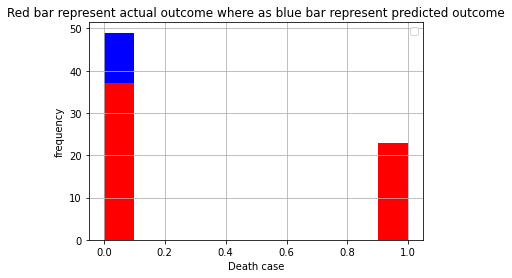

In [27]:
#predicted values

y_pred = lr.predict(X_test)

print (y_pred)

import matplotlib.pyplot as plt
plt.hist(y_pred, color = 'b')
plt.hist(y_test, color = 'r')
plt.title ('Red bar represent actual outcome where as blue bar represent predicted outcome')
plt. xlabel ('Death case')
plt.ylabel ('frequency')
plt.legend()
plt.grid()
plt.show()

In [32]:
#model evaluation using confusion matrix

from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print ('\n confusion matrix: \n', conf_mat)



 confusion matrix: 
 [[35  2]
 [14  9]]


In [33]:
#confusion matrix evaluation
print ('\n Accuracy of prediction: ', metrics.accuracy_score(y_test, y_pred)
    )
print ('\n Precision of prediction: ', metrics.precision_score(y_test, y_pred)
      )
print ('\n Recall: ', metrics.recall_score(y_test, y_pred))



 Accuracy of prediction:  0.7333333333333333

 Precision of prediction:  0.8181818181818182

 Recall:  0.391304347826087
